<a href="https://colab.research.google.com/github/naga-sk/DataScienceTraining-Assignments/blob/main/hackathon1_loan_prediction/Predict_Loan_Eligibility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [81]:
df_train = pd.read_csv("https://raw.githubusercontent.com/naga-sk/DataScienceTraining-Assignments/main/hackathon1_loan_prediction/train_ctrUa4K.csv", index_col="Loan_ID")

In [82]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [83]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [84]:
# Check all numerical variables
df_train.describe()

# We can infer from the numerical data of mean, SD and Quartiles
# Applicant Income and Coapplication Income acutely skewed to the left with outliers to the right
# Loan amount is also skewed to the left
# 360 months seems to be the predominant loan term occupying all three quartiles. Few outliers outside of 360. 
# 84% of applicants seem to have a good credit history in the train data

# Backfill missing values in these numeric fields - LoanAmount, Loan_Amount_Term and Credit_History
# Values in ApplicantIncome and CoapplicantIncome to be normalized using log function

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [85]:
# Check all non-numerical variables
df_train.describe(include="O")

# All fields (except perhaps the dependent variable Loan Status) needs to be label encoded as there are limited unique values
# - Gender, Married, Dependents, Education, Self_Employed, Property_Area
# Backfill missing values in these categorical fields - Gender, Married, Dependents, Self_Employed

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [86]:
# Check count of nulls
df_train.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

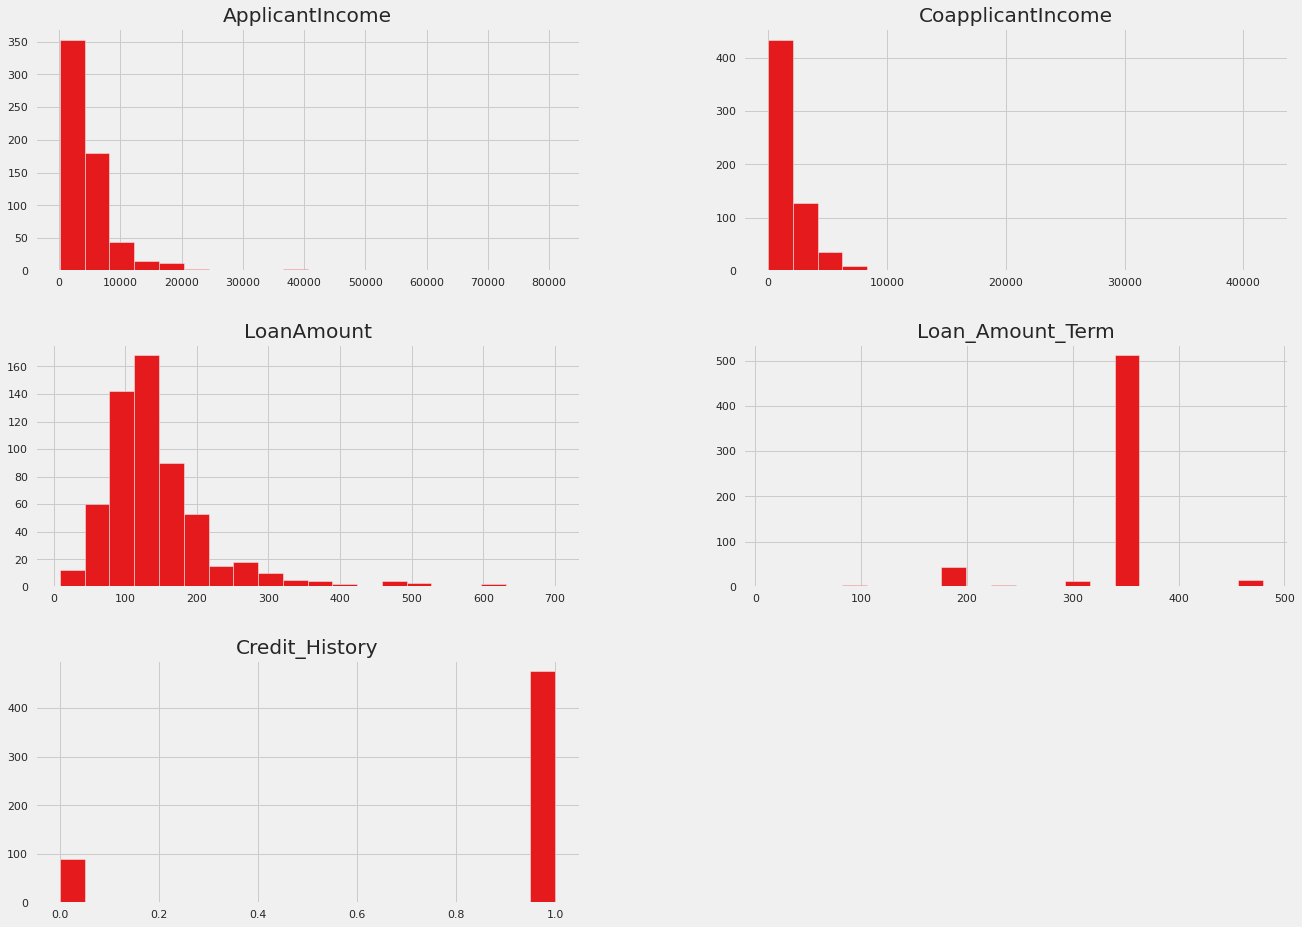

In [87]:
# Basic plot to understand distributions and correlations
import matplotlib.pyplot as plt

df_train.hist(bins = 20, figsize=(20,15))
plt.show()

# As we can see from the diagram below, the ApplicationIncome, CoapplicantIncome 
# and LoanAmount fields have several outliers and also do not follow normal distribution

In [88]:
pip install autoviz -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Shape of your Data Set loaded: (614, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
ApplicantIncome,505,int64,0,0.000000,82.247557,0,
CoapplicantIncome,287,float64,0,0.000000,46.742671,0,highly skewed: drop outliers or do box-cox transform
LoanAmount,203,float64,22,3.583062,33.061889,0,"fill missing, skewed: cap or drop outliers"
Loan_Amount_Term,10,float64,14,2.280130,1.628664,0,"fill missing, skewed: cap or drop outliers"
Dependents,4,object,15,2.442997,0.651466,51,"fill missing, fix mixed data types"
Property_Area,3,object,0,0.000000,0.488599,179,
Gender,2,object,13,2.117264,0.325733,112,"fill missing, fix mixed data types"
Married,2,object,3,0.488599,0.325733,213,"fill missing, fix mixed data types"
Education,2,object,0,0.000000,0.325733,134,
Self_Employed,2,object,32,5.211726,0.325733,82,"fill missing, fix mixed data types"


  Printing upto 30 columns max in each category:
    Numeric Columns : ['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
    Integer-Categorical Columns: ['ApplicantIncome']
    String-Categorical Columns: ['Dependents', 'Property_Area']
    Factor-Categorical Columns: []
    String-Boolean Columns: ['Gender', 'Married', 'Education', 'Self_Employed']
    Numeric-Boolean Columns: ['Credit_History']
    Discrete String Columns: []
    NLP text Columns: []
    Date Time Columns: []
    ID Columns: []
    Columns that will not be considered in modeling: []
    11 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Binary_Classification problem #####################
Number of variables = 11 exceeds limit, finding top 10 variables through XGBoost
    No categorical feature reduction done. All 8 Categorical vars selected 
    Removing correlated variables from 3 numerics using SULO method
Selecting all (3) va

,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
ApplicantIncome,505,int64,0,0.000000,82.247557,0,
CoapplicantIncome,287,float64,0,0.000000,46.742671,0,highly skewed: drop outliers or do box-cox transform
LoanAmount,203,float64,22,3.583062,33.061889,0,"fill missing, skewed: cap or drop outliers"
Loan_Amount_Term,10,float64,14,2.280130,1.628664,0,"fill missing, skewed: cap or drop outliers"
Dependents,4,object,15,2.442997,0.651466,51,"fill missing, fix mixed data types"
Gender,2,object,13,2.117264,0.325733,112,"fill missing, fix mixed data types"
Married,2,object,3,0.488599,0.325733,213,"fill missing, fix mixed data types"
Education,2,object,0,0.000000,0.325733,134,
Self_Employed,2,object,32,5.211726,0.325733,82,"fill missing, fix mixed data types"
Credit_History,2,float64,50,8.143322,0.325733,0,"fill missing, skewed: cap or drop outliers"


  Printing upto 30 columns max in each category:
    Numeric Columns : ['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
    Integer-Categorical Columns: ['ApplicantIncome']
    String-Categorical Columns: ['Dependents']
    Factor-Categorical Columns: []
    String-Boolean Columns: ['Gender', 'Married', 'Education', 'Self_Employed']
    Numeric-Boolean Columns: ['Credit_History']
    Discrete String Columns: []
    NLP text Columns: []
    Date Time Columns: []
    ID Columns: []
    Columns that will not be considered in modeling: []
    10 Predictors classified...
    No variables removed since no ID or low-information variables found in data
    List of variables removed: []
Total Number of Scatter Plots = 6
All Plots are saved in ./AutoViz_Plots/Loan_Status
Time to run AutoViz = 15 seconds 


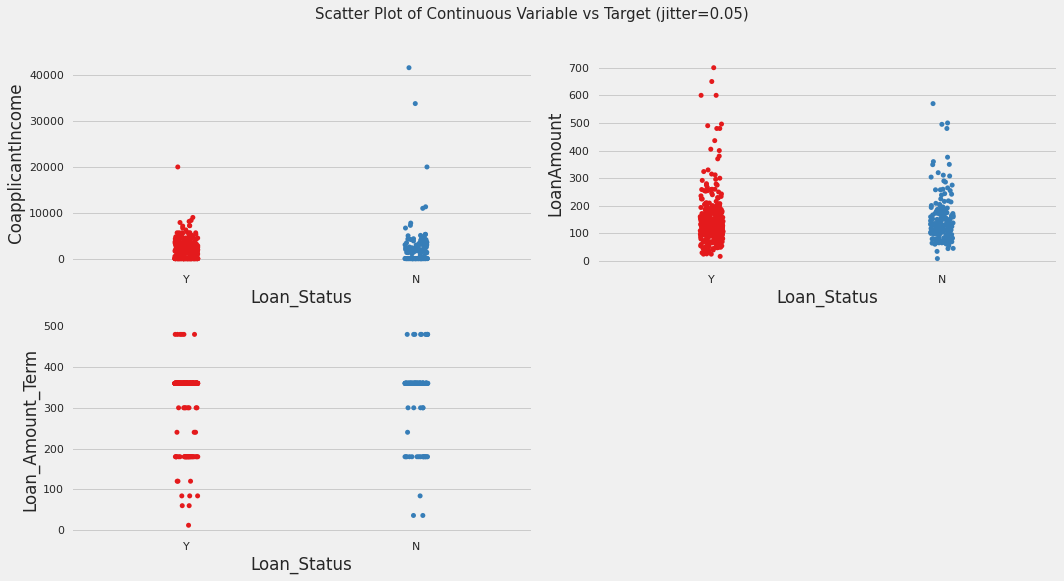

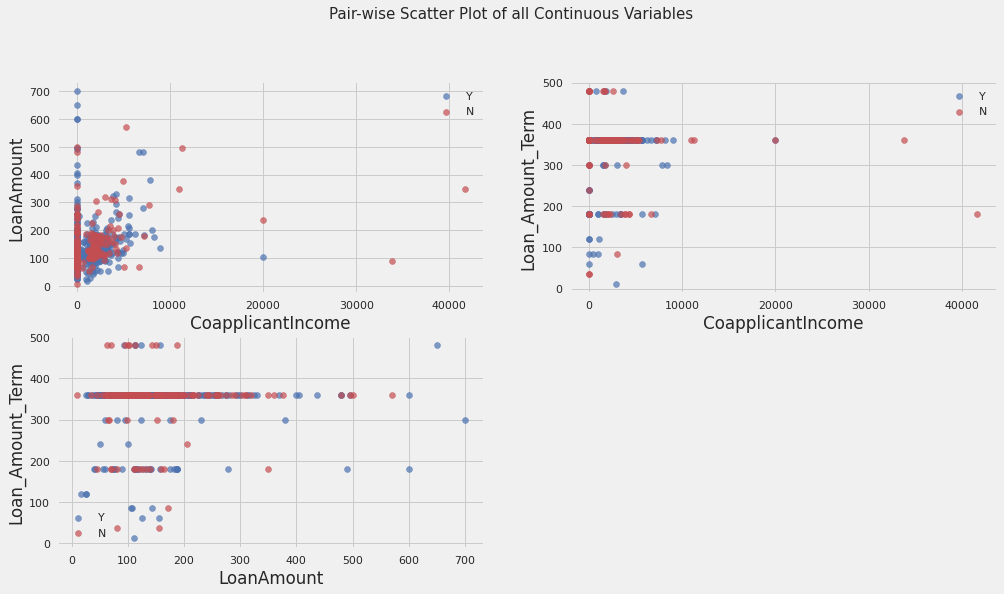

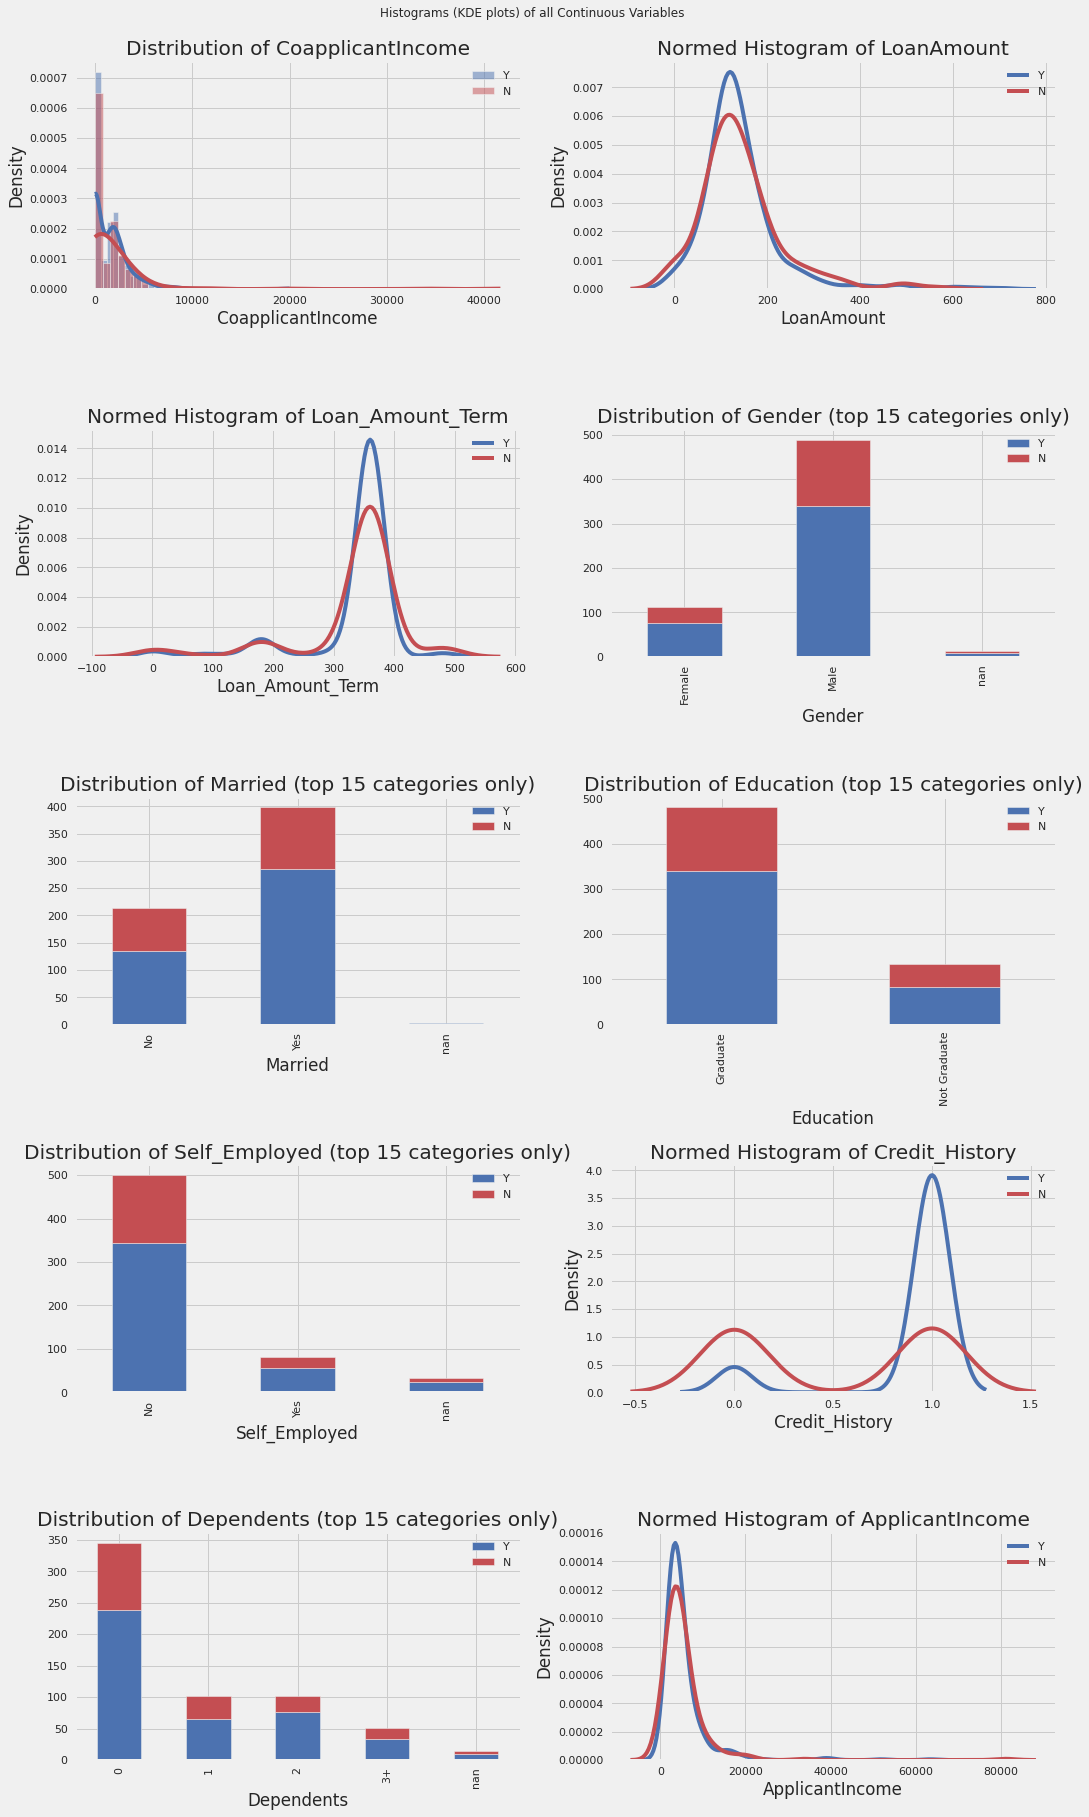

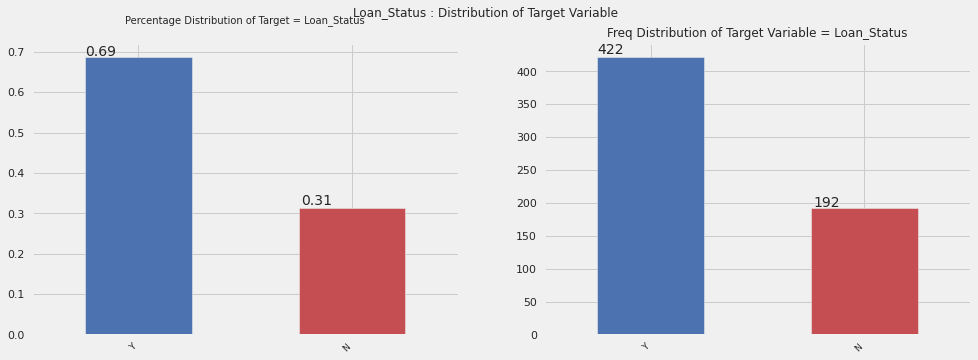

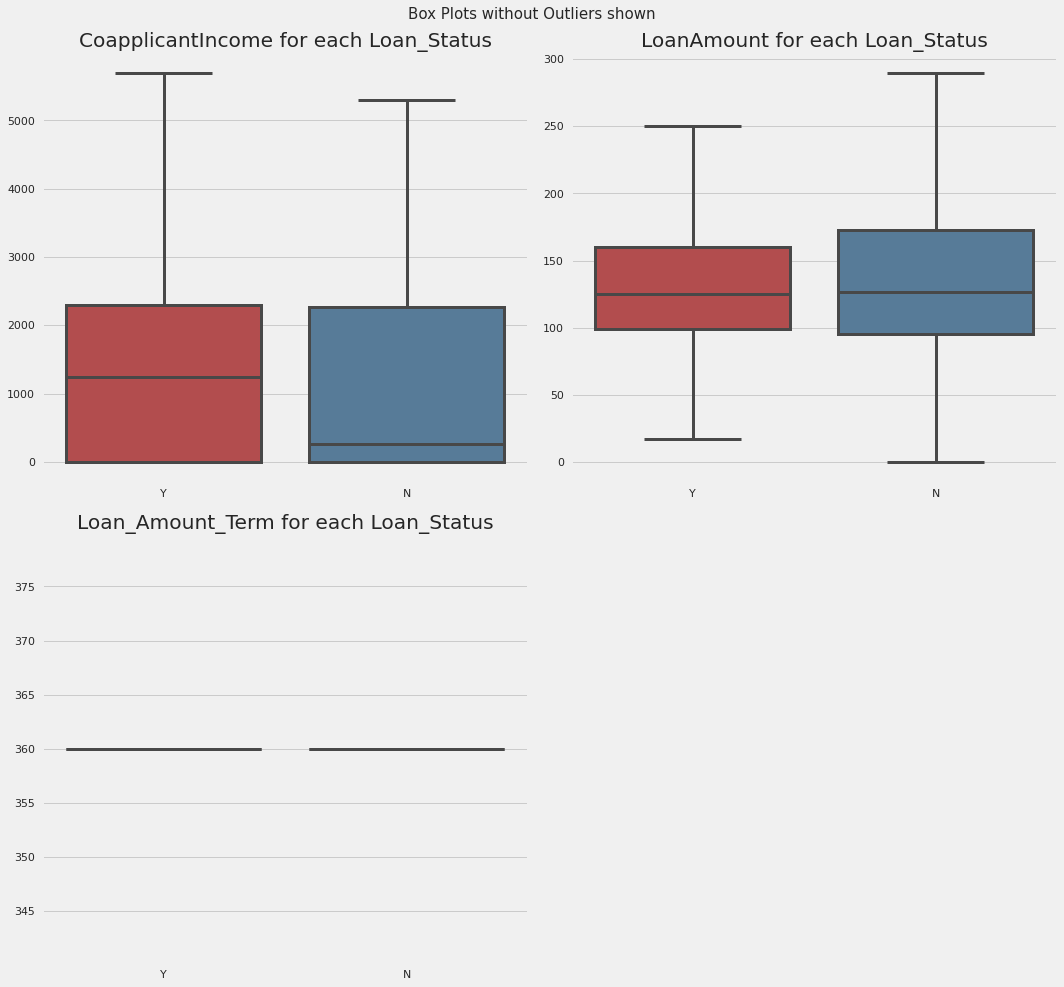

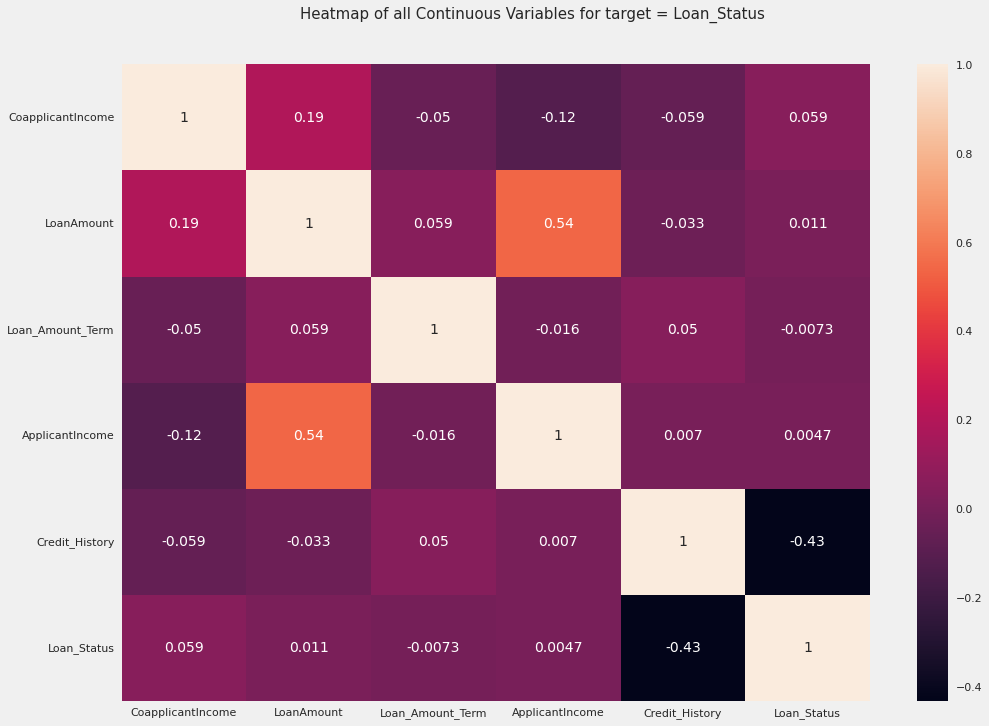

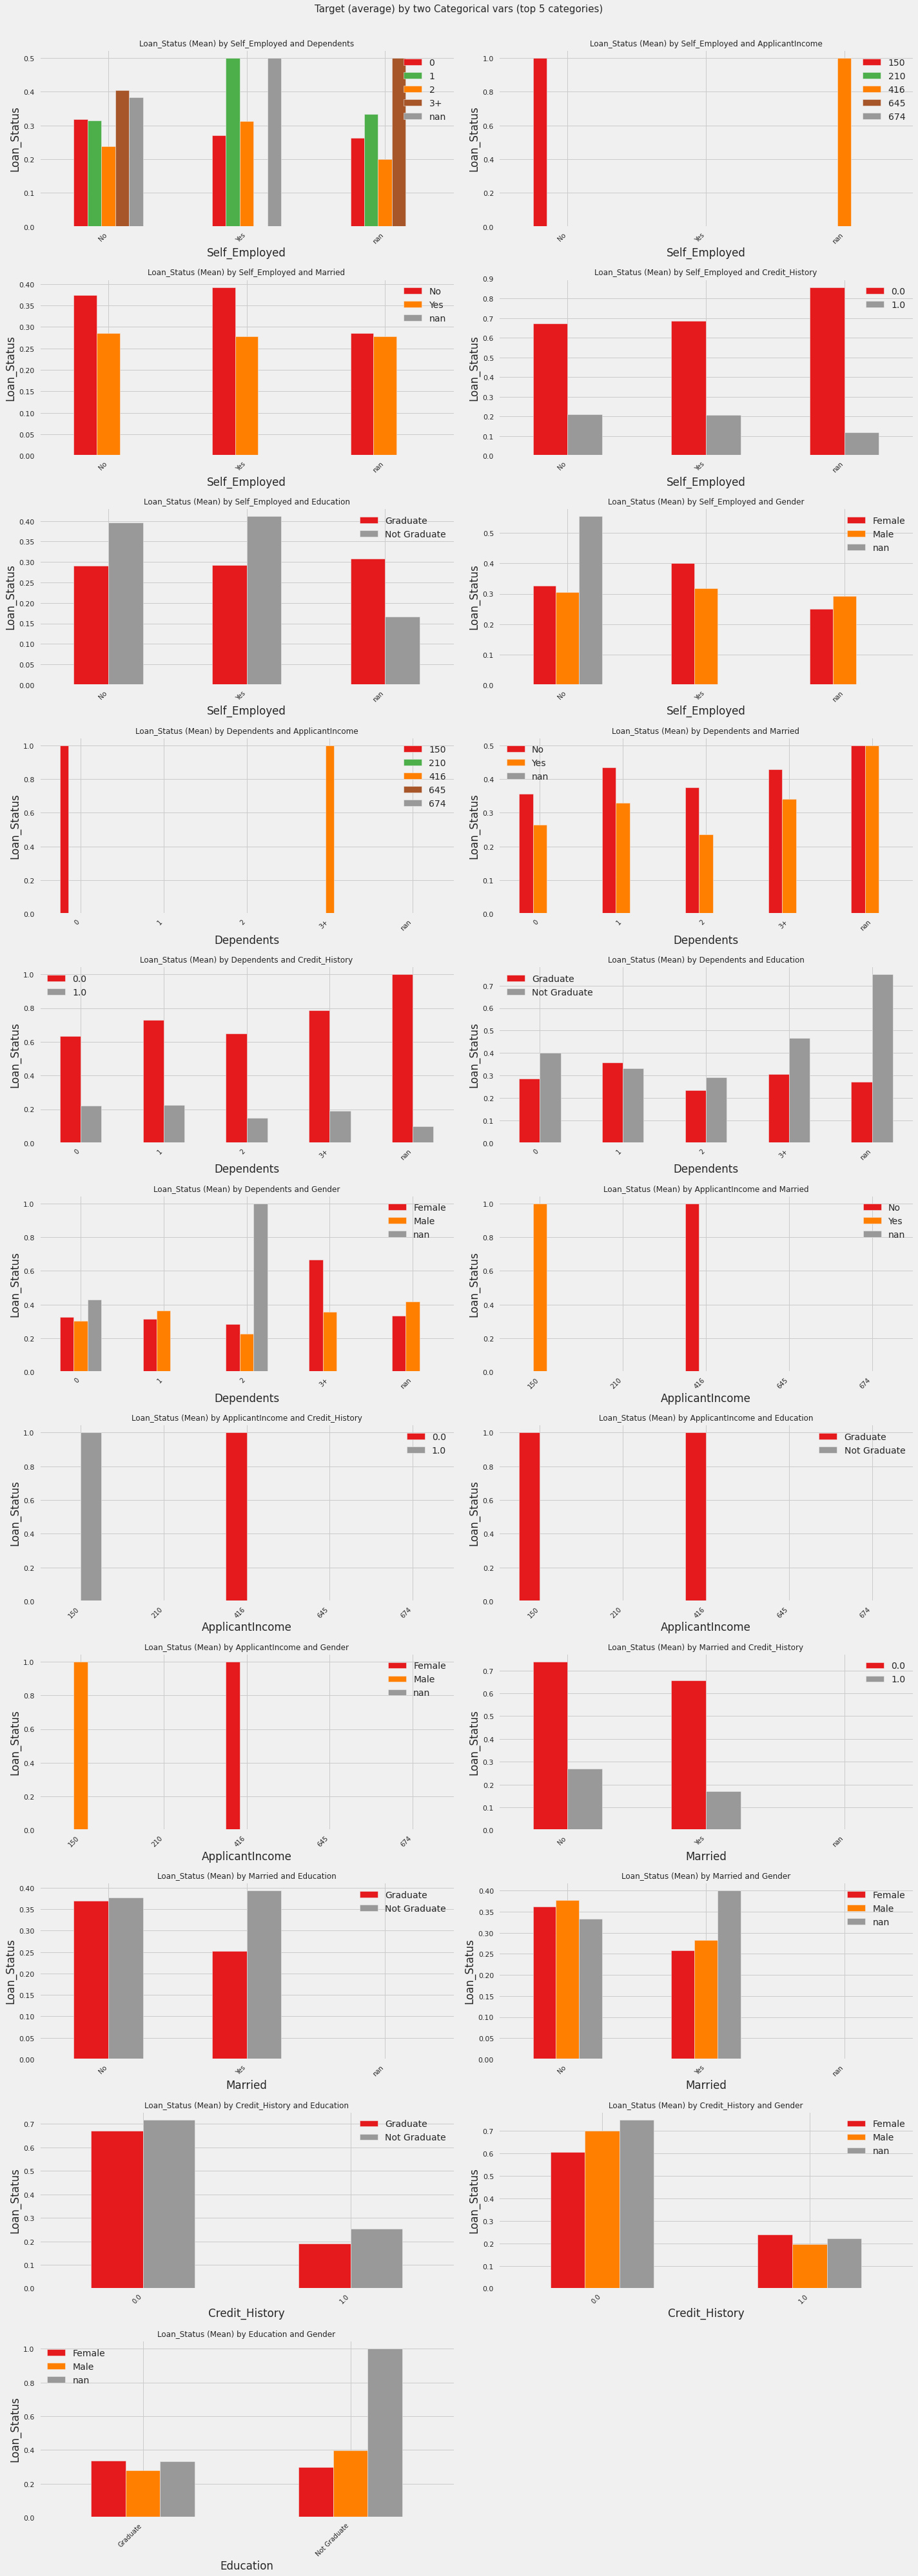

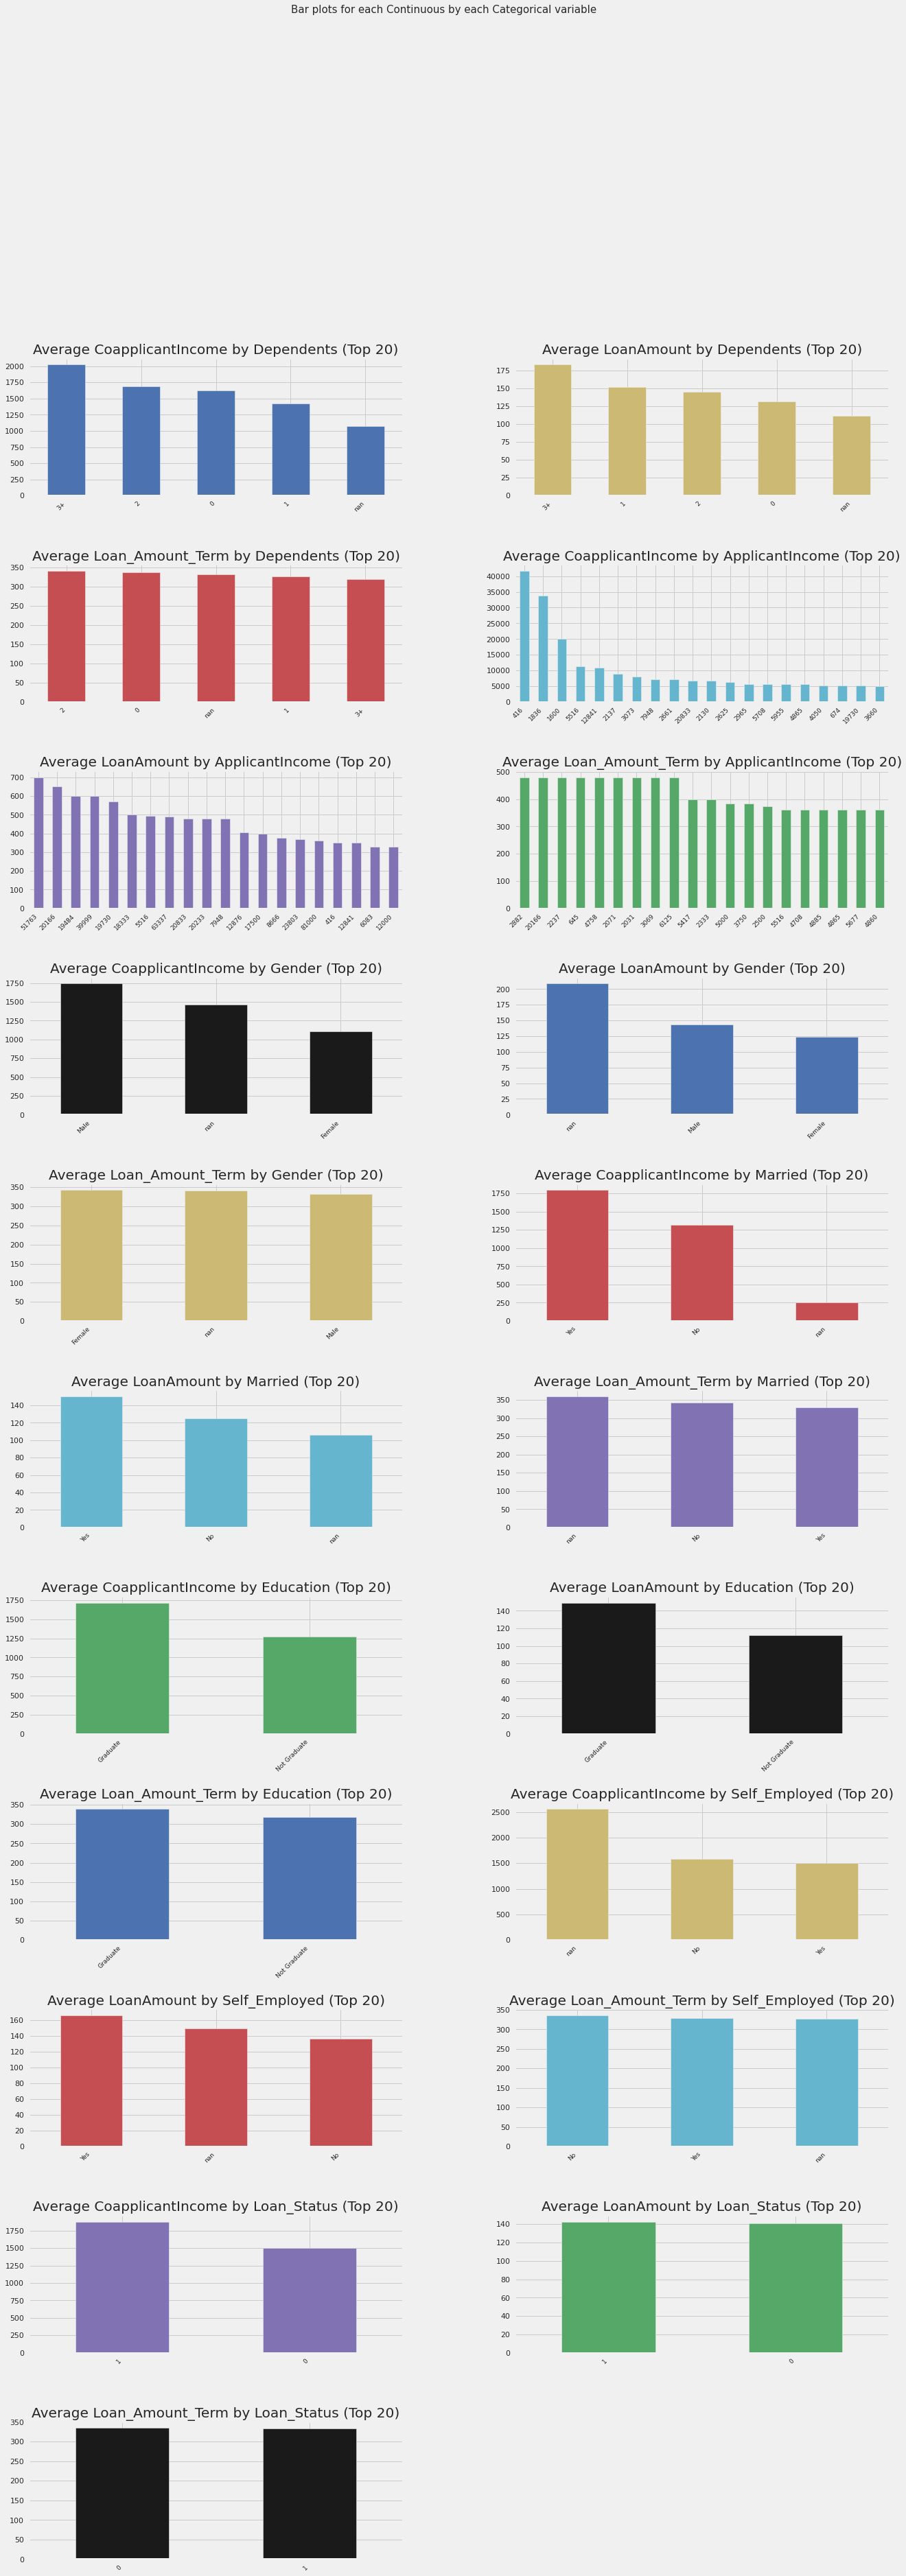

In [89]:
from autoviz.AutoViz_Class import AutoViz_Class
av = AutoViz_Class()
df = av.AutoViz(filename=None,
                depVar='Loan_Status', 
                dfte=df_train, 
                header=0, 
                verbose=2, 
                lowess=False, 
                chart_format='svg', 
                max_rows_analyzed=1000, 
                max_cols_analyzed=10)

In [90]:
from sklearn.preprocessing import LabelEncoder

# This method will fill the missing values and fix the outliers. 
# We will use the same operations on train data and test data (and future production data, if any)

# Copying from our earlier data analysis...

# All fields (except perhaps the dependent variable Loan Status) needs to be label encoded as there are limited unique values
# - Gender, Married, Dependents, Education, Self_Employed, Property_Area
# Backfill missing values in these categorical fields - Gender, Married, Dependents, Self_Employed

# Backfill missing values in these numeric fields - LoanAmount, Loan_Amount_Term and Credit_History
# Values in ApplicantIncome and CoapplicantIncome to be normalized using log function

def clean_data(df):
  lb_make = LabelEncoder()

  # For gender, fill nulls using the most occuring value, and label encode the field
  [df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)]
  df['Gender'] = lb_make.fit_transform(df['Gender'])

  # For Married status, fill nulls using the most occuring value, and label encode the field
  df['Married'].fillna(df['Married'].mode()[0], inplace=True)
  df['Married'] = lb_make.fit_transform(df['Married'])

  # For Education, fill nulls using the most occuring value, and label encode the field
  # Although Education does not have any missing values in the training data set, we may encounter nulls in future data
  df['Education'].fillna(df['Education'].mode()[0], inplace=True)
  df['Education'] = lb_make.fit_transform(df['Education'])
  
  # For self employment status, fill nulls using the most occuring value, and label encode the field
  df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
  df['Self_Employed'] = lb_make.fit_transform(df['Self_Employed'])

  # For Property Area, fill nulls using the most occuring value, and label encode the field
  # Although Property Area does not have any missing values in the training data set, we may encounter nulls in future data
  df['Property_Area'].fillna(df['Property_Area'].mode()[0], inplace=True)
  df['Property_Area'] = lb_make.fit_transform(df['Property_Area'])

  # Dependent is mostly a discrete value already stored as an object because of '3+'. 
  # Normalize 3+ to 3
  # Fill missing values with 0 dependents. No point in using median or mode as it may be inaccurate depending on the data set. 
  # Finally convert the object to numeric data type
  df["Dependents"].loc[df["Dependents"] == "3+"] = 3
  df["Dependents"].fillna('0', inplace=True)
  df["Dependents"] = pd.to_numeric(df["Dependents"])

  # For Credit History, fill nulls using the most occuring value. 
  # No need to label encode as it is already a 0 or 1 value
  df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

  # For Loan Amount, fill nulls using the median value, and label encode the field
  df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

  # For Loan Amount, fill nulls using the median value, and label encode the field
  df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

  # Fix skew by applying log function on the data to normalize
  df['ApplicantIncome'] = np.log1p(df['ApplicantIncome'])
  df['CoapplicantIncome'] = np.log1p(df['CoapplicantIncome'])
#  df['LoanAmount'] = np.log1p(df['LoanAmount'])
#  df['Loan_Amount_Term'] = np.log1p(df['Loan_Amount_Term'])


In [119]:
# Invoke the clean_data method on the train dataset
clean_data(df_train)

# Sample check the cleaned train dataset
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,0,0,2.269462,0.000000,146.412162,360.0,1.0,2,Y
LP001003,1,1,1,0,0,2.243931,2.118566,128.000000,360.0,1.0,0,N
LP001005,1,1,0,0,1,2.197969,0.000000,66.000000,360.0,1.0,2,Y
LP001006,1,1,0,1,0,2.181219,2.170880,120.000000,360.0,1.0,2,Y
LP001008,1,0,0,0,0,2.272093,0.000000,141.000000,360.0,1.0,2,Y


In [120]:
# Ensure there are no nulls
df_train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [93]:
df_train["Dependents"].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [94]:
df_train["Gender"].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [95]:
df_train["Married"].value_counts()

1    401
0    213
Name: Married, dtype: int64

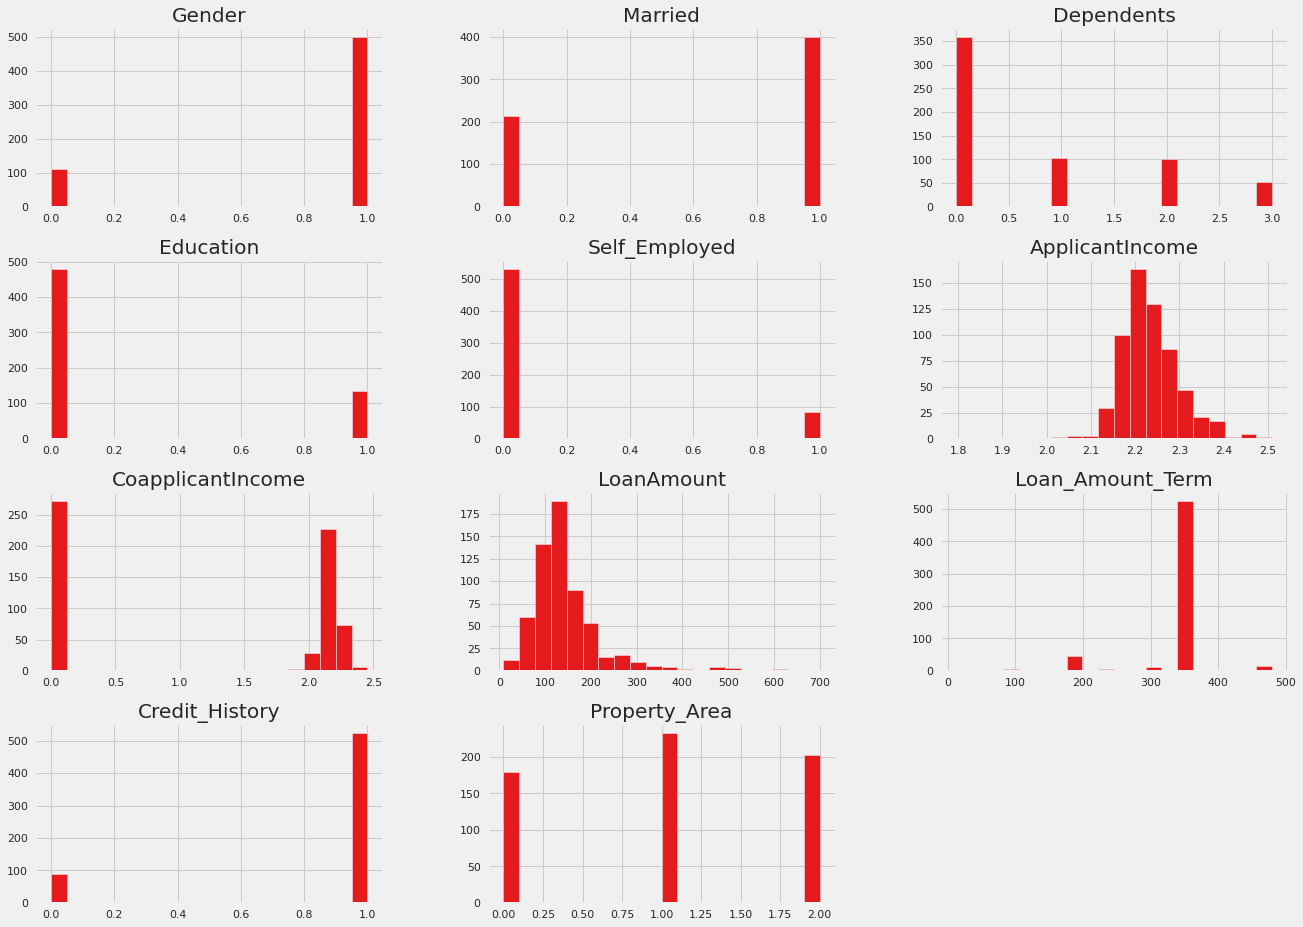

In [121]:
# Reproduce plot to understand distributions and correlations
df_train.hist(bins = 20, figsize=(20,15))
plt.show()

In [97]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(6), object(1)
memory usage: 62.4+ KB


In [98]:
# Isolate independent variables by dropping the dependent variable <Loan_Status>
x_train = df_train.drop("Loan_Status", axis=1)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 57.6+ KB


In [99]:
# Isolate the dependent variable <Loan_Status>
y_train = df_train["Loan_Status"]
y_train.describe()

count     614
unique      2
top         Y
freq      422
Name: Loan_Status, dtype: object

In [100]:
# Apply standard scaler on the train independent variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [101]:
scaler.fit(x_train)

StandardScaler()

In [102]:
x_sscl_train = scaler.transform(x_train)
x_sscl_train

array([[ 0.47234264, -1.37208932, -0.73780632, ...,  0.27985054,
         0.41173269,  1.22329839],
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.27985054,
         0.41173269, -1.31851281],
       [ 0.47234264,  0.72881553, -0.73780632, ...,  0.27985054,
         0.41173269,  1.22329839],
       ...,
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.27985054,
         0.41173269,  1.22329839],
       [ 0.47234264,  0.72881553,  1.24474546, ...,  0.27985054,
         0.41173269,  1.22329839],
       [-2.11710719, -1.37208932, -0.73780632, ...,  0.27985054,
        -2.42876026, -0.04760721]])

In [103]:
# Apply KNN model on the train data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [104]:
knn.fit(x_sscl_train, y_train)

KNeighborsClassifier()

In [105]:
y_knn_pred_train = knn.predict(x_sscl_train)
y_knn_pred_train

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [106]:
# Check accuracy score of the train dataset
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_knn_pred_train, y_train)

0.8127035830618893

In [107]:
# in the confusion matrix, there is a high amount of false positives
# (There sbould be a way to improve this)
confusion_matrix(y_knn_pred_train, y_train)

array([[ 91,  14],
       [101, 408]])

In [108]:
# Read the test dataset
df_test = pd.read_csv("https://raw.githubusercontent.com/naga-sk/DataScienceTraining-Assignments/main/hackathon1_loan_prediction/test_lAUu6dG.csv", index_col="Loan_ID")

In [109]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [110]:
clean_data(df_test)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, LP001015 to LP002989
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int64  
 1   Married            367 non-null    int64  
 2   Dependents         367 non-null    int64  
 3   Education          367 non-null    int64  
 4   Self_Employed      367 non-null    int64  
 5   ApplicantIncome    367 non-null    float64
 6   CoapplicantIncome  367 non-null    float64
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 34.4+ KB


In [111]:
df_test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

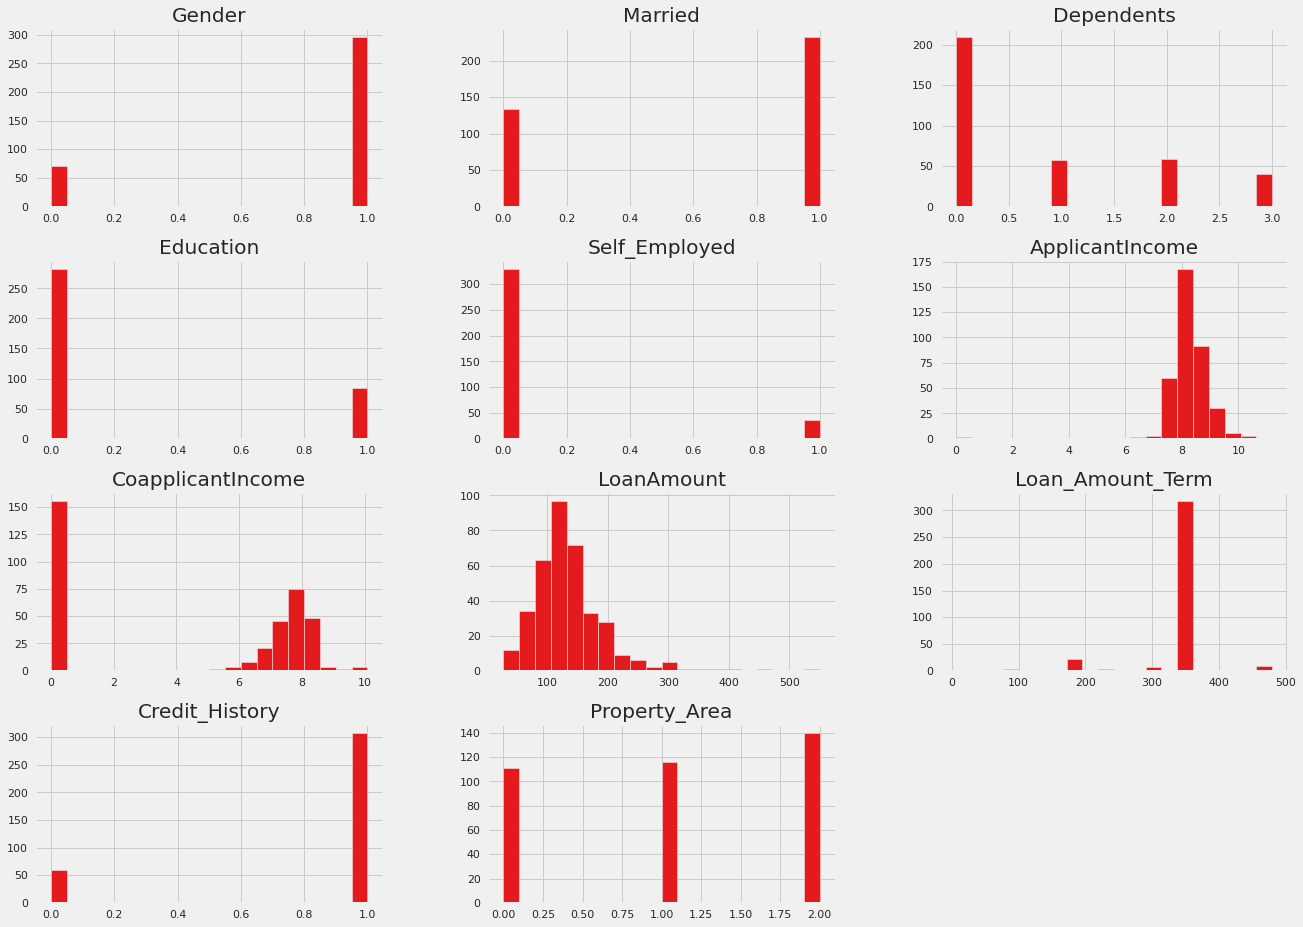

In [112]:
df_test.hist(bins = 20, figsize=(20,15))
plt.show()

In [113]:
scaler.fit(df_test)

StandardScaler()

In [114]:
x_sscl_test = scaler.transform(df_test)
x_sscl_test

array([[ 0.48547939,  0.75835829, -0.75822199, ...,  0.27060267,
         0.4376739 ,  1.11876379],
       [ 0.48547939,  0.75835829,  0.18187082, ...,  0.27060267,
         0.4376739 ,  1.11876379],
       [ 0.48547939,  0.75835829,  1.12196363, ...,  0.27060267,
         0.4376739 ,  1.11876379],
       ...,
       [ 0.48547939, -1.31863792, -0.75822199, ...,  0.27060267,
         0.4376739 , -0.09598861],
       [ 0.48547939,  0.75835829, -0.75822199, ...,  0.27060267,
         0.4376739 , -1.31074101],
       [ 0.48547939, -1.31863792, -0.75822199, ..., -2.51869962,
         0.4376739 , -1.31074101]])

In [115]:
y_knn_pred_test = knn.predict(x_sscl_test)
print(y_knn_pred_test)

['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N'
 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'N' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'N' 'Y' 'N' 'Y

In [116]:
df_test["Loan_Status"] = y_knn_pred_test

In [117]:
df_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001015,1,1,0,0,0,8.651899,0.000000,110.0,360.0,1.0,2,Y
LP001022,1,1,1,0,0,8.031710,7.313887,126.0,360.0,1.0,2,Y
LP001031,1,1,2,0,0,8.517393,7.496097,208.0,360.0,1.0,2,Y
LP001035,1,1,2,0,0,7.758333,7.842671,100.0,360.0,1.0,2,Y
LP001051,1,0,0,1,0,8.094684,0.000000,78.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002971,1,1,3,1,1,8.296547,7.483244,113.0,360.0,1.0,2,Y
LP002975,1,1,0,0,0,8.333030,6.565265,115.0,360.0,1.0,2,Y
LP002980,1,0,0,0,0,8.086718,7.597898,126.0,360.0,1.0,1,Y


In [118]:
df_test["Loan_Status"].to_csv("submission.csv")